In [1]:
import pandas as pd
import sklearn as sk
import time
import numpy as np
from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib
import matplotlib.pyplot as plt
#%pylab inline
#%%

t1 = time.time()
print('Loading database ...')
df = pd.read_hdf('database/all_data_comp.h5','table')
print('Time to load database:', time.time()-t1)
#%%

# Variable names.
import var_names
d = var_names.d

# Check number of combinations, just to be sure.


features =  ['rpm',
             'frp',
             'exh_T',
             'TC_rpm']


import itertools

def list_of_combs(arr):
    """returns a list of all subsets of a list"""
    
    combs = []
    for i in range(1, len(arr)+1):
        listing = [list(x) for x in itertools.combinations(arr, i)]
        combs.extend(listing)
    return combs

# Not used, does not produce a good list..
#
#for l in range(1, len(features)+1):
#    for subset in itertools.combinations(features, l):
#        print(subset)
#        
#comb = list()
#
#for i in range(0,len(features)):
#    for a in itertools.combinations(features,i+1):
#        comb.append(a)

combinations = list_of_combs(features)
for i in range(len(combinations)):
    print(combinations[i])

print('\nNumber of combinations:',len(combinations))


Loading database ...
Time to load database: 2.8837778568267822
['rpm']
['frp']
['exh_T']
['TC_rpm']
['rpm', 'frp']
['rpm', 'exh_T']
['rpm', 'TC_rpm']
['frp', 'exh_T']
['frp', 'TC_rpm']
['exh_T', 'TC_rpm']
['rpm', 'frp', 'exh_T']
['rpm', 'frp', 'TC_rpm']
['rpm', 'exh_T', 'TC_rpm']
['frp', 'exh_T', 'TC_rpm']
['rpm', 'frp', 'exh_T', 'TC_rpm']

Number of combinations: 15


In [2]:

# The combinations are done manually in an Excel workbook, it was too tedious to make. This way it is easier but
# might not be the best way... it works...


feat = pd.read_excel('training_setup.xlsx',index_col='test_no')

# Create a list of features for each test. A list which will contain a list of features for each row. This list
# will be used for the training.

test_features = list()


for i in range(30):
    
    tmp_l = list()
    
    if feat.iloc[i][0] == 1:
        #print('ett')
        for j in range(1,5):
            tmp_l.append(d[feat.iloc[i][j]])
            print('Test:',i+1,feat.iloc[i][j])
        
    elif feat.iloc[i][0] == 2:
        #print('två')
        for j in range(1,5):
            tmp_l.append(d[feat.iloc[i][j]])
            print('Test:',i+1,feat.iloc[i][j])
        for j in range(5,9):
            tmp_l.append(d[feat.iloc[i][j]])
            print('Test:',i+1,feat.iloc[i][j])
        
    elif feat.iloc[i][0] == 3:
        for j in range(1,5):
            tmp_l.append(d[feat.iloc[i][j]])
            print('Test:',i+1,feat.iloc[i][j])
        for j in range(5,9):
            tmp_l.append(d[feat.iloc[i][j]])
            print('Test:',i+1,feat.iloc[i][j])
        for j in range(9,13):
            tmp_l.append(d[feat.iloc[i][j]])
            print('Test:',i+1,feat.iloc[i][j])
        
    elif feat.iloc[i][0] == 4:
        for j in range(1,5):
            tmp_l.append(d[feat.iloc[i][j]])
            print('Test:',i+1,feat.iloc[i][j])
        for j in range(5,9):
            tmp_l.append(d[feat.iloc[i][j]])
            print('Test:',i+1,feat.iloc[i][j])
        for j in range(9,13):
            tmp_l.append(d[feat.iloc[i][j]])
            print('Test:',i+1,feat.iloc[i][j])
        for j in range(13,17):
            tmp_l.append(d[feat.iloc[i][j]])
            print('Test:',i+1,feat.iloc[i][j])
    
    test_features.append(tmp_l)

# And then at last add the corresponding predictor to each test set.


for i in range(len(test_features)):
    if 'AE1' in test_features[i][0]:
        test_features[i].append(d['fo_booster_13'])
    if 'AE2' in test_features[i][0]:
        test_features[i].append(d['fo_booster_24'])


Test: 1 ae1_rpm
Test: 1 ae3_rpm
Test: 1 me1_rpm
Test: 1 me3_rpm
Test: 2 ae1_frp
Test: 2 ae3_frp
Test: 2 me1_frp
Test: 2 me3_frp
Test: 3 ae1_exh_T
Test: 3 ae3_exh_T
Test: 3 me1_exh_T
Test: 3 me3_exh_T
Test: 4 ae1_TC_rpm
Test: 4 ae3_TC_rpm
Test: 4 me1_TC_rpm
Test: 4 me3_TC_rpm
Test: 5 ae1_rpm
Test: 5 ae3_rpm
Test: 5 me1_rpm
Test: 5 me3_rpm
Test: 5 ae1_frp
Test: 5 ae3_frp
Test: 5 me1_frp
Test: 5 me3_frp
Test: 6 ae1_rpm
Test: 6 ae3_rpm
Test: 6 me1_rpm
Test: 6 me3_rpm
Test: 6 ae1_exh_T
Test: 6 ae3_exh_T
Test: 6 me1_exh_T
Test: 6 me3_exh_T
Test: 7 ae1_rpm
Test: 7 ae3_rpm
Test: 7 me1_rpm
Test: 7 me3_rpm
Test: 7 ae1_TC_rpm
Test: 7 ae3_TC_rpm
Test: 7 me1_TC_rpm
Test: 7 me3_TC_rpm
Test: 8 ae1_frp
Test: 8 ae3_frp
Test: 8 me1_frp
Test: 8 me3_frp
Test: 8 ae1_exh_T
Test: 8 ae3_exh_T
Test: 8 me1_exh_T
Test: 8 me3_exh_T
Test: 9 ae1_frp
Test: 9 ae3_frp
Test: 9 me1_frp
Test: 9 me3_frp
Test: 9 ae1_TC_rpm
Test: 9 ae3_TC_rpm
Test: 9 me1_TC_rpm
Test: 9 me3_TC_rpm
Test: 10 ae1_exh_T
Test: 10 ae3_exh_T
Test: 

In [3]:
df_train = pd.DataFrame()
for i in range(len(test_features)):
    df_train = df_train.append(df[test_features[i]]).resample('15min').mean()
    

df_train = df_train.dropna()

# Filter out below zero
    

for n in list(df_train):
    df_train[n][(df_train[n] < 0)] = 0
    

date_begin = '2014-02-01'
date_end = '2014-12-16'

df_train = df_train[date_begin:date_end]

print(df_train.describe())

       AE1 ENG SPEED:1745:RPM:Average:900  \
count                        30624.000000   
mean                           394.698595   
std                            367.883957   
min                              0.000000   
25%                              0.000000   
50%                            737.733333   
75%                            750.466667   
max                            760.000000   

       AE1 EXH MEAN VALUE:1591:  C:Average:900  \
count                             30624.000000   
mean                                222.944978   
std                                 146.610908   
min                                   0.000000   
25%                                  75.466667   
50%                                 320.400000   
75%                                 359.533333   
max                                 431.066667   

       AE1 FUEL RACK POSIT:1742:mm:Average:900  \
count                             30624.000000   
mean                                 10.828

In [38]:

from sklearn.externals import joblib
from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

gen = 10
cores = -1

results = list()
cols = ['test_no','model','MSE','MSE_perc','R2-score','coef']

df_out = pd.DataFrame()

df_out['y_13'] = df_train[d['fo_booster_13']]
df_out['y_24'] = df_train[d['fo_booster_24']]


seed = 42 # This is to get reproduce.


for test_no in range(len(test_features)):
    
    # Feature selection for the test run
    print('Test run', test_no, '\n')
    
    df_test = df_train[test_features[test_no]]
    # drop the last column, which is the measured
    X = np.array(df_test.drop(df_test.columns[len(df_test.columns)-1],axis=1))
    # y is the measured value
    y = np.array(df_test[df_test.columns[len(df_test.columns)-1]])
    
    # make a test and train split.
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=seed)
    
    # 
    
    print('Test number, linear model: ', test_no, '\n')
    m_linear = sk.linear_model.LinearRegression(n_jobs=cores)
    m_linear.fit(X_train, y_train.reshape(-1,))
    
    df_out['linear_test_no_'+str(test_no)] = m_linear.predict(X)
    
    MSE = mean_squared_error(m_linear.predict(X_test),y_test)
    MSE_perc = mean_squared_error(m_linear.predict(X_test),y_test)/max(y_test)
    R_2 = r2_score(m_linear.predict(X_test),y_test)
    
    readable = list()
    for g in range(len(list(df_test))-1):
        #print(g)
        readable.append(d[list(df_test)[g]]+': '+str(m_linear.coef_[g]))
    
    print('MSE: ',MSE )
    print('MSE %: ',MSE_perc )
    print('R2 score:', R_2)
    print(readable)
    
    results.append([test_no,'linear',MSE,MSE_perc,R_2,readable])


Test run 0 

Test number, linear model:  0 

MSE:  0.020751914179531383
MSE %:  0.007660924530644874
R2 score: 0.8449911584110031
['ae1_rpm: 0.0002829647723174473', 'ae3_rpm: -3.7667819035563184e-05', 'me1_rpm: 0.0015379412879452927', 'me3_rpm: 0.0014808872294868962']
Test run 1 

Test number, linear model:  1 

MSE:  0.008844792204968992
MSE %:  0.0032652065243377777
R2 score: 0.9389967717585165
['ae1_frp: 0.012281406154461333', 'ae3_frp: -0.0009344122536376592', 'me1_frp: 0.01306719102837232', 'me3_frp: 0.01301745863697864']
Test run 2 

Test number, linear model:  2 

MSE:  0.02505056265261032
MSE %:  0.009247844236033382
R2 score: 0.8067858465965971
['ae1_exh_T: 0.0007453837697878059', 'ae3_exh_T: -4.613598962062903e-05', 'me1_exh_T: 0.0017192736986634044', 'me3_exh_T: 0.0017620229308720264']
Test run 3 

Test number, linear model:  3 

MSE:  0.005299930998506011
MSE %:  0.0019565602982893966
R2 score: 0.964493994771804
['ae1_TC_rpm: 1.80703531208048e-05', 'ae3_TC_rpm: 2.8194367302

In [7]:
m_linear.get_params(deep=True)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': -1, 'normalize': False}

In [40]:
results = pd.DataFrame(results, columns=cols)
results.to_excel('results/run_180210/linear_run.xlsx')

In [31]:
m_linear.coef_[0]

0.0002829647723174473

In [16]:
from sklearn.feature_selection import RFE
selector = RFE(m_linear, 5, step=1)
selector = selector.fit(X, y)
selector.support_
selector.ranking_

array([1, 1, 1, 1])

In [20]:
m_linear.coef_

array([ 2.82964772e-04, -3.76678190e-05,  1.53794129e-03,  1.48088723e-03])

In [4]:
# Train models and produce results...
# 

from sklearn.externals import joblib
from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### Train a linear model just for comparison.

gen = 10
cores = -1

results = list()
cols = ['test_no','model','MSE','MSE_perc','R2-score']

df_out = pd.DataFrame()

df_out['y_13'] = df_train[d['fo_booster_13']]
df_out['y_24'] = df_train[d['fo_booster_24']]


seed = 42 # This is to get reproduce.


#for test_no in range(len(test_features)):
for test_no in range(0,1):
    
    # Feature selection for the test run
    print('Test run', test_no, '\n')
    
    df_test = df_train[test_features[test_no]]
    # drop the last column, which is the measured
    X = np.array(df_test.drop(df_test.columns[len(df_test.columns)-1],axis=1))
    # y is the measured value
    y = np.array(df_test[df_test.columns[len(df_test.columns)-1]])
    
    # make a test and train split.
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=seed)
    
    # 
    
    print('Test number, linear model: ', test_no, '\n')
    m_linear = sk.linear_model.LinearRegression(n_jobs=cores)
    m_linear.fit(X_train, y_train.reshape(-1,))
    
    df_out['linear_test_no_'+str(test_no)] = m_linear.predict(X)
    
    MSE = mean_squared_error(m_linear.predict(X_test),y_test)
    MSE_perc = mean_squared_error(m_linear.predict(X_test),y_test)/max(y_test)
    R_2 = r2_score(m_linear.predict(X_test),y_test)
    
    print('MSE: ',MSE )
    print('MSE %: ',MSE_perc )
    print('R2 score:', R_2)
    
    results.append([test_no,'linear',MSE,MSE_perc,R_2])
    
    # tpot model
    
    print('Test number, TPOT model: ', test_no, '\n')

    m_tpot = TPOTRegressor(generations=gen, population_size=50, verbosity=2, n_jobs=cores)
    m_tpot.fit(X_train, y_train.reshape(-1,))
    
    df_out['tpot_test_no_'+str(test_no)] = m_tpot.predict(X)
    
    MSE = mean_squared_error(m_tpot.predict(X_test),y_test)
    MSE_perc = mean_squared_error(m_tpot.predict(X_test),y_test)/max(y_test)
    R_2 = r2_score(m_tpot.predict(X_test),y_test)
    
    print('MSE: ',MSE )
    print('MSE %: ',MSE_perc )
    print('R2 score:', R_2)
    
    results.append([test_no,'tpot',MSE,MSE_perc,R_2])
    

    

results = pd.DataFrame(results, columns=cols)
results.to_excel('results/run_180210/test_run.xlsx')
df_out.to_hdf('results/run_180210/df_out.h5','table',complevel=9,complib='blosc')


Test run 0 

Test number, linear model:  0 

MSE:  0.0207519141795314
MSE %:  0.00766092453064488
R2 score: 0.8449911584110014
Test number, TPOT model:  0 



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Generation 1 - Current best internal CV score: -0.004130317639937286


Generation 2 - Current best internal CV score: -0.0041301529063429146


Generation 3 - Current best internal CV score: -0.0040646702020535035


Generation 4 - Current best internal CV score: -0.004053847319654523


Generation 5 - Current best internal CV score: -0.004053847319654523


Generation 6 - Current best internal CV score: -0.004053847319654523


Generation 7 - Current best internal CV score: -0.004053847319654523


Generation 8 - Current best internal CV score: -0.004053847319654523


Generation 9 - Current best internal CV score: -0.0040536438569537744


Generation 10 - Current best internal CV score: -0.004053223901289258



Best pipeline: ExtraTreesRegressor(MaxAbsScaler(input_matrix), bootstrap=True, max_features=0.8500000000000001, min_samples_leaf=1, min_samples_split=20, n_estimators=100)
MSE:  0.004019807487257575
MSE %:  0.0014839807798538661
R2 score: 0.9731131789295406


In [ ]:
# Train models and produce results...
# 

from sklearn.externals import joblib
from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### Train a linear model just for comparison.

gen = 10
cores = -1

results = list()
cols = ['test_no','model','MSE','MSE_perc','R2-score']

df_out = pd.DataFrame()

df_out['y_13'] = df_train[d['fo_booster_13']]
df_out['y_24'] = df_train[d['fo_booster_24']]


seed = 42 # This is to get reproduce.


for test_no in range(len(test_features)):
    
    # Feature selection for the test run
    print('Test run', test_no, '\n')
    
    df_test = df_train[test_features[test_no]]
    # drop the last column, which is the measured
    X = np.array(df_test.drop(df_test.columns[len(df_test.columns)-1],axis=1))
    # y is the measured value
    y = np.array(df_test[df_test.columns[len(df_test.columns)-1]])
    
    # make a test and train split.
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=seed)
    
    # 
    
    print('Test number, linear model: ', test_no, '\n')
    m_linear = sk.linear_model.LinearRegression(n_jobs=cores)
    m_linear.fit(X_train, y_train.reshape(-1,))
    
    df_out['linear_test_no_'+str(test_no)] = m_linear.predict(X)
    
    MSE = mean_squared_error(m_linear.predict(X_test),y_test)
    MSE_perc = mean_squared_error(m_linear.predict(X_test),y_test)/max(y_test)
    R_2 = r2_score(m_linear.predict(X_test),y_test)
    
    print('MSE: ',MSE )
    print('MSE %: ',MSE_perc )
    print('R2 score:', R_2)
    
    results.append([test_no,'linear',MSE,MSE_perc,R_2])
    
    # tpot model
    
    print('Test number, TPOT model: ', test_no, '\n')

    m_tpot = TPOTRegressor(generations=gen, population_size=50, verbosity=2, n_jobs=cores)
    m_tpot.fit(X_train, y_train.reshape(-1,))
    
    df_out['tpot_test_no_'+str(test_no)] = m_tpot.predict(X)
    
    MSE = mean_squared_error(m_tpot.predict(X_test),y_test)
    MSE_perc = mean_squared_error(m_tpot.predict(X_test),y_test)/max(y_test)
    R_2 = r2_score(m_tpot.predict(X_test),y_test)
    
    print('MSE: ',MSE )
    print('MSE %: ',MSE_perc )
    print('R2 score:', R_2)
    
    results.append([test_no,'tpot',MSE,MSE_perc,R_2])
    

results = pd.DataFrame(results, columns=cols)
results.to_excel('results/run_180210/2_test_run.xlsx')
df_out.to_hdf('results/run_180110/2_df_out.h5','table',complevel=9,complib='blosc')


Test run 0 

Test number, linear model:  0 

MSE:  0.0207519141795314
MSE %:  0.00766092453064488
R2 score: 0.8449911584110014
Test number, TPOT model:  0 



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Generation 1 - Current best internal CV score: -0.004040208327555095


Generation 2 - Current best internal CV score: -0.004040208327555095


Generation 3 - Current best internal CV score: -0.004040208327555095


Generation 4 - Current best internal CV score: -0.004040208327555095


Generation 5 - Current best internal CV score: -0.004040208327555095


Generation 6 - Current best internal CV score: -0.004040208327555095


Generation 7 - Current best internal CV score: -0.004040208327555095


Generation 8 - Current best internal CV score: -0.004018545793392216


Generation 9 - Current best internal CV score: -0.003992184172375004


Generation 10 - Current best internal CV score: -0.003992184172375004



Best pipeline: XGBRegressor(input_matrix, learning_rate=0.1, max_depth=7, min_child_weight=9, n_estimators=100, nthread=1, subsample=0.9500000000000001)
MSE:  0.004031966109240564
MSE %:  0.0014884693433956427
R2 score: 0.9731434643639371
Test run 1 

Test number, linear model:  1 

MSE:  0.00884479220496899
MSE %:  0.003265206524337777
R2 score: 0.938996771758517
Test number, TPOT model:  1 



Generation 1 - Current best internal CV score: -0.0018826913144613737


Generation 2 - Current best internal CV score: -0.0018707748815437373


Generation 3 - Current best internal CV score: -0.001855723305107387


Generation 4 - Current best internal CV score: -0.0018389154185768752


Generation 5 - Current best internal CV score: -0.0017995438730053631


Generation 6 - Current best internal CV score: -0.0017995438730053631


Generation 7 - Current best internal CV score: -0.0017995438730053631


Generation 8 - Current best internal CV score: -0.0017995438730053631


Generation 9 - Current best internal CV score: -0.0017995438730053631


Generation 10 - Current best internal CV score: -0.0017995438730053631



Best pipeline: XGBRegressor(LassoLarsCV(input_matrix, normalize=True), learning_rate=0.1, max_depth=7, min_child_weight=17, n_estimators=100, nthread=1, subsample=1.0)
MSE:  0.001946974253497957
MSE %:  0.000718758890872269
R2 score: 0.9872125498430397
Test run 2 

Test number, linear model:  2 

MSE:  0.02505056265261032
MSE %:  0.009247844236033382
R2 score: 0.8067858465965964
Test number, TPOT model:  2 



Generation 1 - Current best internal CV score: -0.005330280125418293


Generation 2 - Current best internal CV score: -0.005330280125418293


Generation 3 - Current best internal CV score: -0.005255888704972102


Generation 4 - Current best internal CV score: -0.005255888704972102


Generation 5 - Current best internal CV score: -0.005198894053834885


Generation 6 - Current best internal CV score: -0.005198894053834885


Generation 7 - Current best internal CV score: -0.00518801914677282


Generation 8 - Current best internal CV score: -0.00518801914677282


Generation 9 - Current best internal CV score: -0.00518801914677282


Generation 10 - Current best internal CV score: -0.005184058377506879



Best pipeline: XGBRegressor(DecisionTreeRegressor(ExtraTreesRegressor(input_matrix, bootstrap=False, max_features=0.7500000000000001, min_samples_leaf=1, min_samples_split=6, n_estimators=100), max_depth=5, min_samples_leaf=18, min_samples_split=13), learning_rate=0.1, max_depth=7, min_child_weight=4, n_estimators=100, nthread=1, subsample=0.9500000000000001)
MSE:  0.0048022979725040925
MSE %:  0.0017728505439421362
R2 score: 0.9682018495050114
Test run 3 

Test number, linear model:  3 

MSE:  0.005299930998506014
MSE %:  0.001956560298289398
R2 score: 0.9644939947718036
Test number, TPOT model:  3 



Generation 1 - Current best internal CV score: -0.0016932033353033952


Generation 2 - Current best internal CV score: -0.0016932033353033952


Generation 3 - Current best internal CV score: -0.0016309734156011286


Generation 4 - Current best internal CV score: -0.0016309734156011286


Generation 5 - Current best internal CV score: -0.0016309734156011286


Generation 6 - Current best internal CV score: -0.0016309734156011286


Generation 7 - Current best internal CV score: -0.0016309734156011286


Generation 8 - Current best internal CV score: -0.0016309734156011286


Generation 9 - Current best internal CV score: -0.0016309734156011286


Generation 10 - Current best internal CV score: -0.0016309734156011286



Best pipeline: ExtraTreesRegressor(input_matrix, bootstrap=False, max_features=0.55, min_samples_leaf=1, min_samples_split=15, n_estimators=100)
MSE:  0.001719326307163226
MSE %:  0.0006347187526306193
R2 score: 0.9886275476512637
Test run 4 

Test number, linear model:  4 

MSE:  0.004761374730946834
MSE %:  0.0017577430284422535
R2 score: 0.9680686377785986
Test number, TPOT model:  4 



Generation 1 - Current best internal CV score: -0.001183142425751077


Generation 2 - Current best internal CV score: -0.001183142425751077


Generation 3 - Current best internal CV score: -0.001183142425751077


Generation 4 - Current best internal CV score: -0.0011662673063863884


Generation 5 - Current best internal CV score: -0.0011534897671329144


Generation 6 - Current best internal CV score: -0.001148921992750118


Generation 7 - Current best internal CV score: -0.001148921992750118


Generation 8 - Current best internal CV score: -0.001148921992750118


Generation 9 - Current best internal CV score: -0.0011338147037312834


Generation 10 - Current best internal CV score: -0.0011338147037312834



Best pipeline: RandomForestRegressor(input_matrix, bootstrap=False, max_features=0.4, min_samples_leaf=2, min_samples_split=4, n_estimators=100)
MSE:  0.0012814821194305577
MSE %:  0.0004730810719144
R2 score: 0.9915940430849012
Test run 5 

Test number, linear model:  5 

MSE:  0.013496726123207993
MSE %:  0.004982547602411803
R2 score: 0.902868758873885
Test number, TPOT model:  5 



Generation 1 - Current best internal CV score: -0.0010375640840909121


Generation 2 - Current best internal CV score: -0.0010375640840909121


Generation 3 - Current best internal CV score: -0.0010375640840909121


Generation 4 - Current best internal CV score: -0.0009768134646414232


Generation 5 - Current best internal CV score: -0.0009387502430655327


Generation 6 - Current best internal CV score: -0.0009387502430655327


Generation 7 - Current best internal CV score: -0.0009352551784988719


Generation 8 - Current best internal CV score: -0.0008910858493256623


Generation 9 - Current best internal CV score: -0.0008756124060192123


Generation 10 - Current best internal CV score: -0.0008754541141005572



Best pipeline: ExtraTreesRegressor(ElasticNetCV(PolynomialFeatures(input_matrix, degree=2, include_bias=False, interaction_only=False), l1_ratio=0.7000000000000001, tol=0.0001), bootstrap=False, max_features=0.6500000000000001, min_samples_leaf=1, min_samples_split=3, n_estimators=100)
MSE:  0.000817125008278709
MSE %:  0.0003016556914397917
R2 score: 0.9946590027626764
Test run 6 

Test number, linear model:  6 

MSE:  0.004192350558380513
MSE %:  0.0015476780096478442
R2 score: 0.9721497628094513
Test number, TPOT model:  6 



Generation 1 - Current best internal CV score: -0.0013597315254979567


Generation 2 - Current best internal CV score: -0.0013597315254979567


Generation 3 - Current best internal CV score: -0.0013004442028298022


Generation 4 - Current best internal CV score: -0.0013004442028298022


Generation 5 - Current best internal CV score: -0.0013004442028298022


Optimization Progress:  55%|███████████████████████████                      | 304/550 [20:09<3:21:32, 49.16s/pipeline]

AttributeError: module 'matplotlib.pyplot' has no attribute 'labels'

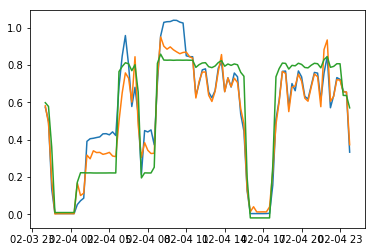

In [91]:
import matplotlib.pyplot as plt

date='2014-02-04'

plt.plot(df_out['y_13'][date])
plt.plot(df_out['tpot_test_no_0'][date])
plt.plot(df_out['linear_test_no_0'][date])

plt.show()

#df_out

In [80]:
df_out = pd.read_hdf('results/run_180207/df_out.h5','table')

In [78]:
df_out = pd.DataFrame()

In [79]:
df_out

""


In [12]:
df_test = pd.DataFrame()
test_no = 2

In [13]:
df_test['test_no'+str(test_no)] = 2

In [14]:
df_test

,test_no2


In [ ]:
for P in sizes:
        fig, ax = plt.subplots()
        fig.set_size_inches(P)
        plt.plot(x,m_linear.predict(X)[n1:n1+sample_n])
        plt.plot(x,y[n1:n1+sample_n])

        ax.set(xlabel='sample no', ylabel='FO flow m3/h',
               title='Sklearn Linear model. Training number:' + str(test_no) + '\nFeatures: \n '+ str(features_readable))
        ax.grid()

        fig.savefig("results/run_180205/linear_test_no_" + str(test_no) + str(P) + ".png")
        
        
        fig, ax = plt.subplots()
        fig.set_size_inches(P)
        plt.scatter(m_linear.predict(X)[n1:n1+sample_n],y[n1:n1+sample_n])

        ax.set(xlabel='predicted flow m3/h', ylabel='measured flow m3/h',
               title='Sklearn Linear model. Training number:' + str(test_no) + '\nFeatures: \n '+ str(features_readable))
        ax.grid()

        fig.savefig("results/run_180205/scatter_sample_linear_test_no_" + str(test_no) + str(P) + ".png")
        
        fig, ax = plt.subplots()
        fig.set_size_inches(P)
        plt.scatter(m_linear.predict(X),y)

        ax.set(xlabel='predicted flow m3/h', ylabel='measured flow m3/h',
               title='Sklearn Linear model. Training number:' + str(test_no) + '\nFeatures: \n '+ str(features_readable))
        ax.grid()

        fig.savefig("results/run_180205/scatter_all_linear_test_no_" + str(test_no) + str(P) + ".png")
        
    
    # tpot model
    
    print('Test number, TPOT model: ', test_no, '\n')
    

    m_tpot = TPOTRegressor(generations=gen, population_size=50, verbosity=2, n_jobs=cores)
    m_tpot.fit(X_train, y_train.reshape(-1,))

    score = m_tpot.score(X_test,y_test)
    score_perc = m_tpot.score(X_test,y_test)/max(y_test)
    print('Score: ',score )
    print('Score in % of max: ',score_perc )
    
    results.append([test_no,'tpot',score,score_perc])
    
    features_readable = list()
    for t in range(len(test_features[test_no])):
        features_readable.append(d[test_features[test_no][t]])

    x = np.linspace(n1+1,n1+sample_n,sample_n)
    
    sizes = [[10,6],[12,8],[14,10]]
    for P in sizes:
        fig, ax = plt.subplots()
        fig.set_size_inches(P)
        plt.plot(x,m_linear.predict(X)[n1:n1+sample_n])
        plt.plot(x,y[n1:n1+sample_n])

        ax.set(xlabel='sample no', ylabel='FO flow m3/h',
               title='Sklearn TPOT model. Training number:' + str(test_no) + '\nFeatures: \n '+ str(features_readable))
        ax.grid()

        fig.savefig("results/run_180205/tpot_test_no_" + str(test_no) + str(P) + ".png")
        
        fig, ax = plt.subplots()
        fig.set_size_inches(P)
        plt.scatter(m_tpot.predict(X)[n1:n1+sample_n],y[n1:n1+sample_n])

        ax.set(xlabel='predicted flow m3/h', ylabel='measured flow m3/h',
               title='Sklearn TPOT model. Training number:' + str(test_no) + '\nFeatures: \n '+ str(features_readable))
        ax.grid()

        fig.savefig("results/run_180205/scatter_sample_tpot_test_no_" + str(test_no) + str(P) + ".png")
        
        fig, ax = plt.subplots()
        fig.set_size_inches(P)
        plt.scatter(m_tpot.predict(X),y)

        ax.set(xlabel='predicted flow m3/h', ylabel='measured flow m3/h',
               title='Sklearn TPOT model. Training number:' + str(test_no) + '\nFeatures: \n '+ str(features_readable))
        ax.grid()

        fig.savefig("results/run_180205/scatter_all_tpot_test_no_" + str(test_no) + str(P) + ".png")
    
    

In [3]:
a = linear_model.LinearRegression()

In [ ]:
a.